In [45]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [46]:
css()

In [47]:
code_toggle()

In [50]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.5em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [51]:
update('collocations')

Updated file `D:\Documents\GitHub\Miscellaneous-Notebooks\UiO-november\collocations.py`

In [52]:
from collocations import make_collocations, collocation, colls2df, urn_coll

In [53]:
import pandas as pd

In [54]:
import ast

In [55]:
#colls_before = pd.read_json('demokrati_before.json')

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [58]:
#colls_after = pd.read_json('demokrati_after.json')

In [59]:
#colls_before.columns = list(map(lambda x: ast.literal_eval(x)[0], colls_before.columns))

In [60]:
#colls_after.columns = list(map(lambda x: ast.literal_eval(x)[0], colls_after.columns))

In [61]:
#show = lambda res, col, axis=1: res.sort_values(by=col, ascending=False).head(20).fillna(0).style.background_gradient(axis=axis)

In [62]:
demokrati = nb.make_graph('demokrati', cutoff=16)

# Analyse av begreper/ord

<br>
<br>

## Lars G.B. Johnsen
## Nasjonaliblioteket

<br>
<br>

<br>
<br>
<br>
<br><br>
<br>

# DH-lab

https://nbviewer.jupyter.org/github/DH-LAB-NB/DHLAB/blob/master/DHLAB_ved_Nasjonalbiblioteket.ipynb

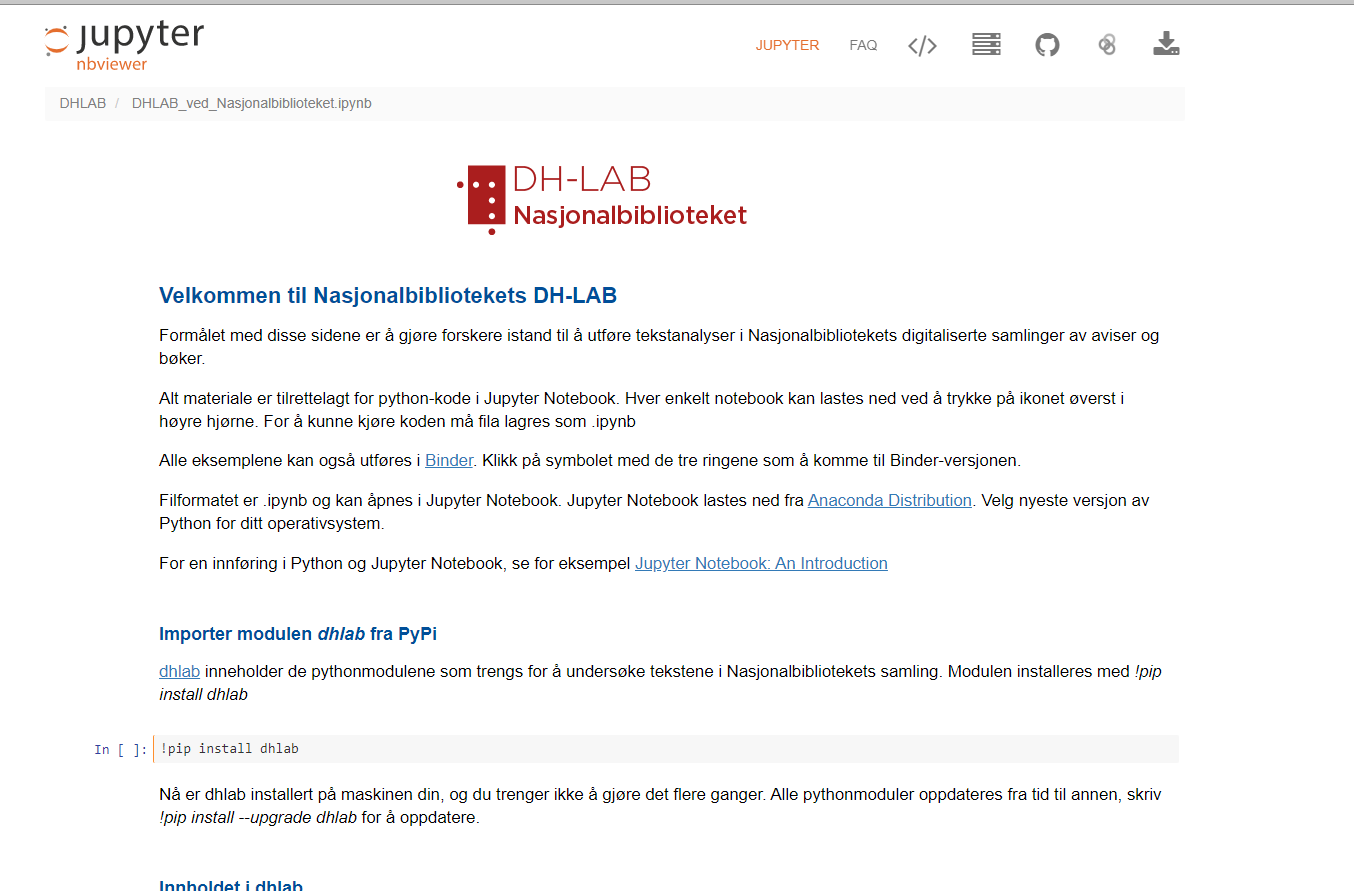

<br/>
<br/>
<br/>

# Ordtelling


Andrew Piper 

“At base, the distributional hypothesis assumes four things: a) a word’s meaning is tied to how often it occurs; 
b) a word’s meaning is tied to how often it occurs with other words within a given context; 
c) these relationships are entirely contingent upon the scale of analysis; and d) these relationships can be rendered spatially to capture the semantic associations between them."

Piper, Andrew. Enumerations (pp. 13-14). University of Chicago Press. Kindle Edition. 


In [69]:
alle_ord = nb.frame_sort(nb.frame(nb.totals(1000), 'frekvens'))

<br>
<br>
<br>
<br>


# Bokhylla bøker rene ord


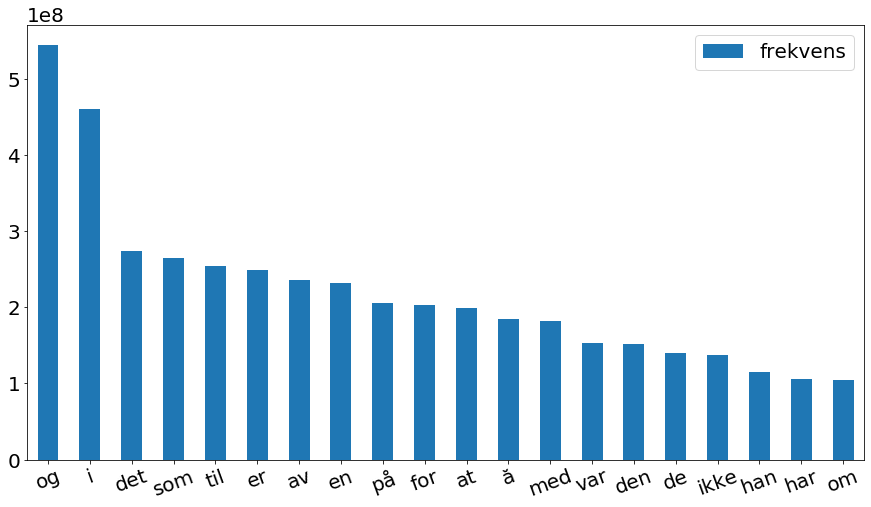

In [71]:
alle_ord.loc[[x for x in alle_ord.index if x.isalpha()]][:20].plot(kind='bar', rot= 20, figsize=(15, 8));


<br>
<br>

# Bokhylla bøker med tall og punktuering

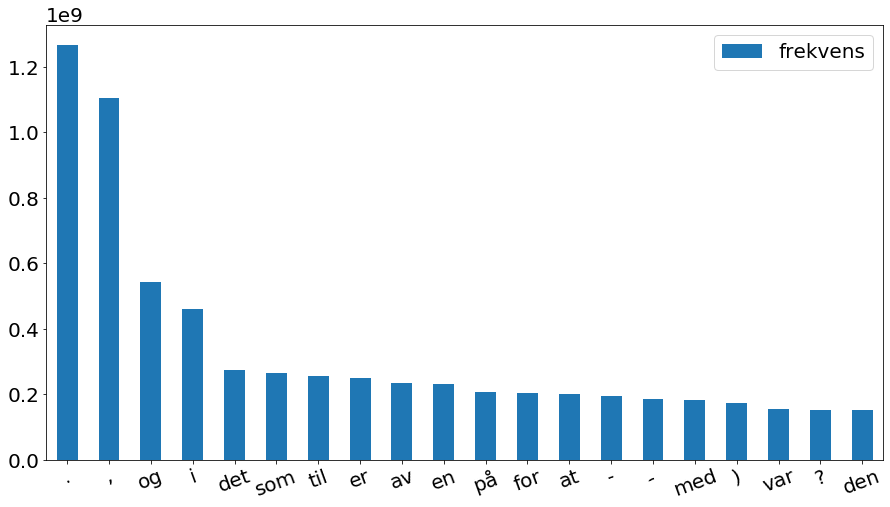

In [70]:
alle_ord[:20].plot(kind='bar', rot= 20, figsize=(15, 8));

# Normalisert

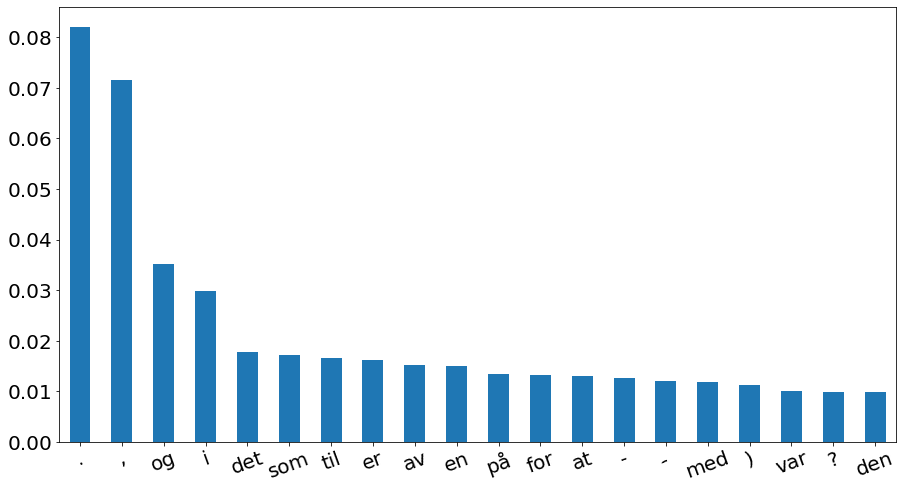

In [74]:
df = alle_ord
(df/df.sum())[:20].plot(kind='bar', rot= 20, figsize=(15, 8), legend=False);

<br/>
<br/>
<br/>

# Ordet *demokrati*

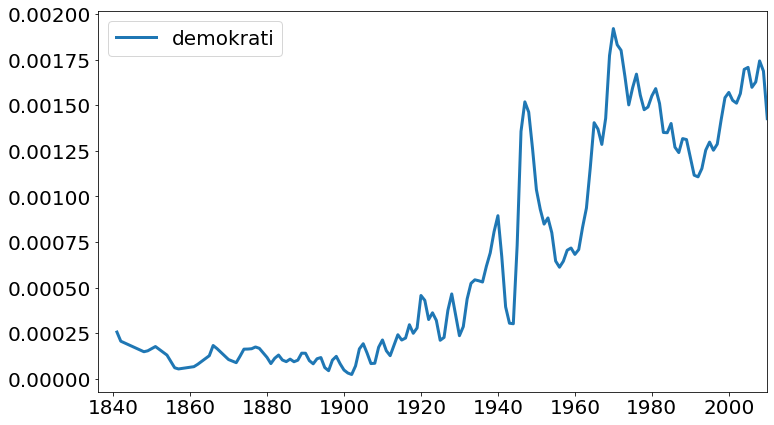

In [79]:
nb.nb_ngram('demokrati').plot(lw=3, figsize=(12,7));

<br>
<br>
<br>
<br>

# Ordet *demokrati* i koordinasjonskontekst

* demokrati **og** diktatur
* fred **og** demokrati
* demokrati **og** ytringsfrihet
* ytringsfrihet **og** menneskerettigheter
* menneskerettigheter **og** demokrat

<br>
<br>
<br>
<br>

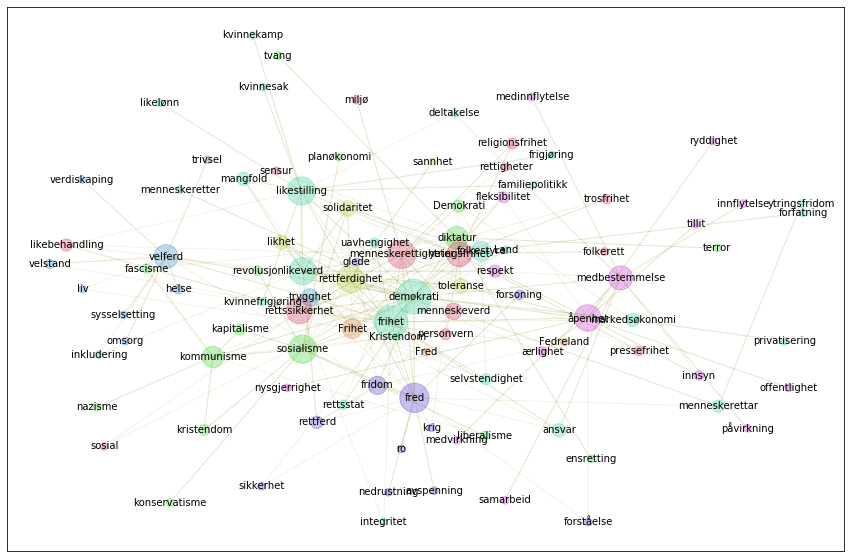

In [28]:
gnl.show_graph(demokrati, spread = 1.8);

In [29]:
comm = gnl.community_dict(demokrati)

<br>
<br>
<br>

# Clustre fra grafen

In [80]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.5em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### rettferdighet-solidaritet
<span style='font-size:1.5em'>rettferdighet, solidaritet, likhet, toleranse, sannhet</span>
### sosialisme-diktatur
<span style='font-size:1.5em'>sosialisme, diktatur, kommunisme, Demokrati, kapitalisme, kristendom, revolusjon, liberalisme, fascisme, Kristendom, nazisme, ensretting, planøkonomi, konservatisme, terror, tvang</span>
### demokrati-frihet
<span style='font-size:1.5em'>demokrati, frihet, likestilling, likeverd, folkestyre, ansvar, mangfold, markedsøkonomi, menneskerettar, selvstendighet, rettsstat, uavhengighet, forfatning, deltakelse, familiepolitikk, likelønn, kvinnekamp, menneskeretter, frigjøring, kvinnefrigjøring, inkludering, kvinnesak, privatisering, ytringsfridom, integritet, Land</span>
### velferd-trygghet
<span style='font-size:1.5em'>velferd, trygghet, velstand, helse, liv, omsorg, trivsel, sysselsetting, verdiskaping</span>
### fred-fridom
<span style='font-size:1.5em'>fred, fridom, rettferd, forsoning, ro, krig, glede, sikkerhet, nedrustning, avspenning, forståelse</span>
### åpenhet-medbestemmelse
<span style='font-size:1.5em'>åpenhet, medbestemmelse, respekt, fleksibilitet, ærlighet, innsyn, nysgjerrighet, ryddighet, påvirkning, innflytelse, medinnflytelse, medvirkning, tillit, offentlighet, samarbeid</span>
### menneskerettigheter-rettssikkerhet
<span style='font-size:1.5em'>menneskerettigheter, rettssikkerhet, ytringsfrihet, menneskeverd, likebehandling, personvern, religionsfrihet, pressefrihet, trosfrihet, sosial, miljø, folkerett, rettigheter, sensur</span>
### Frihet-Fedreland
<span style='font-size:1.5em'>Frihet, Fedreland, Fred</span>


In [170]:
demokrati_dict = gnl.community_dict(demokrati)

<br>
<br>
<br>

# Konkordanser og kollokasjoner
<br>



In [104]:
nb.concordance(word='demokrati', before=10, after = 10, corpus='avis', yearfrom=1990, yearto=1995, size=1)

jaerbladet-19900103,"tvilen snikende : Kan dette virkelig fortsette , mot fullverdig",demokrati,og fredelig sameksistens ? Eller — hvor store tilbakslag bør
jaerbladet-19900112,stort antall barn og ungdom opplæring og praktisk trening i,demokrati,", organisasjonsarbeid og samfunnsengasjement . Kanskje vil ikke organisasjonenes betydning"
jaerbladet-19900205,"sterkt at samvittighei og grunnlov trampes på , da norsk",demokrati,viser sitt ufullkomne ansikt . Det er et hktum at
jaerbladet-19900305,dem . . . Lenge leve USA ' s frie,demokrati,"! Kleppe , 2 / 3 - 90 DagFolkvord Ad"
stavangeraftenblad-19900104,på vegne av Storbritannia og Frankrike la det unge tsjekkoslovakiske,demokrati,åpent for Hitlers tropper . Med et lite smil fortalte
stavangeraftenblad-19900104,ser ut til å bli satt likhetstegn mellom oppbygging av,demokrati,og en fri markedsøkonomi - med alle dens svakheter og
stavangeraftenblad-19900104,"andre målene var beskyttelsen av amerikanske borgere , gjeninnføringen av",demokrati,"i Panama , og sikringen av Panama-kanalen . - Jeg"
stavangeraftenblad-19900104,menige nektet å adlyde ordre eller deserterte under demonstrasjonene for,demokrati,i mai og juni . Det var denne brigaden som
klassekampen-19910904,"ikke aksepterer partiledelsens framgangsmåte , Øog til deres sans for",demokrati,Øog « fair play » . - Dette er et
klassekampen-19910904,"utviklet marxismen til en demokratisk folkevegelse , der kravet til",demokrati,for arbeidstakerne går mye lenger enn det de borgerlige partiene
klassekampen-19910907,regjeringen på Cuba har nå dannet sin egen organisasjon for,demokrati,", Øog kaller seg « Concertacion democratica cubana » ,"


In [27]:
#colls.to_json('demokrati_collocations.json')

# Sammenligner med en referanse


<br>

<span style="font-size:150%">`tot = nb.frame(nb.totals(50000), 'tot')`</span>

In [81]:
tot = nb.frame(nb.totals(50000), 'tot')

In [26]:
#colls = pd.concat([nb.frame(coll[d], d) for d in coll], axis=1, sort=False).fillna(0)

In [82]:
colls = pd.read_json('demokrati_collocations.json')

In [157]:
agg = pd.DataFrame()
step = 5
for i in range(0, len(colls.columns), step):
    agg[colls.columns[i]] = colls[colls.columns[i:i+step]].sum(axis=1)

<br>
<br>
<br>
<br>

# Demokrati fra opptelling

In [141]:
%%HTML
<style>
tr {
font-size:150%;
}
</style>

In [158]:
agg.sort_values(by=1965, ascending=False)[:10].style.background_gradient()

,1920,1935,1950,1965,1980,1995
.,4262,22259,53002,61217,71058,34017
",",3498,14590,34531,39347,44780,23009
i,1714,9301,28930,38056,39025,19008
og,2454,13872,30071,34995,42265,21121
det,2331,10884,24897,26313,23042,10598
er,1358,8257,20751,24514,28719,14964
for,1041,6615,17093,20587,23293,11373
som,1144,6834,16637,19322,19991,9803
et,824,5396,16211,18306,21271,10317
at,928,4498,12280,15167,15296,7255


In [159]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = (agg[i]/agg[i].sum())/(tot.tot/tot.tot.sum())

In [160]:
nb.normalize_corpus_dataframe(pmi)

True

<br>
<br>
<br>
<br>


# De 15 beste for 1965

In [161]:
pmi.sort_values(by=1965, ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1920,1935,1950,1965,1980,1995
industrielt,0.0141323,0.00244299,0.0369976,0.0116689,0.000364157,8.81641e-05
diktatur,0.0275252,0.0201816,0.0104121,0.0107258,0.00974349,0.00613167
sosialisme,0.00268965,0.00808811,0.00737364,0.0102617,0.00347929,0.00193598
parlamentarisk,0.00461876,0.00139324,0.00321979,0.00589375,0.00448428,0.00388101
demokrati,0.00553765,0.00652724,0.00494788,0.00512981,0.00349728,0.00323475
Demokrati,0.00185841,0.00360669,0.00233054,0.00457253,0.00378791,0.00469513
arbeidsplassen,3.07853e-05,5.73565e-05,0.00281672,0.0044361,0.000351757,0.000130404
sosialistisk,0.00137329,0.00221746,0.00201335,0.00433125,0.00176529,0.000753463
parlamentariske,0.0080445,0.0021649,0.00322016,0.00410196,0.00175338,0.00160644
levedyktig,0.000275952,0.00531267,0.00323356,0.0037273,0.00249618,0.00166987


# Hvordan utvikler omgivelsene seg for ordet _demokrati_ ?

In [162]:
barchart = lambda w, title='': pmi.loc[w].transpose().plot(kind='bar',title=title, rot=40, figsize=(15,8)) ;

In [163]:
aggchart = lambda w, title='': agg.loc[w].transpose().plot(kind='bar',title=title, rot=40, figsize=(15,8)) ;

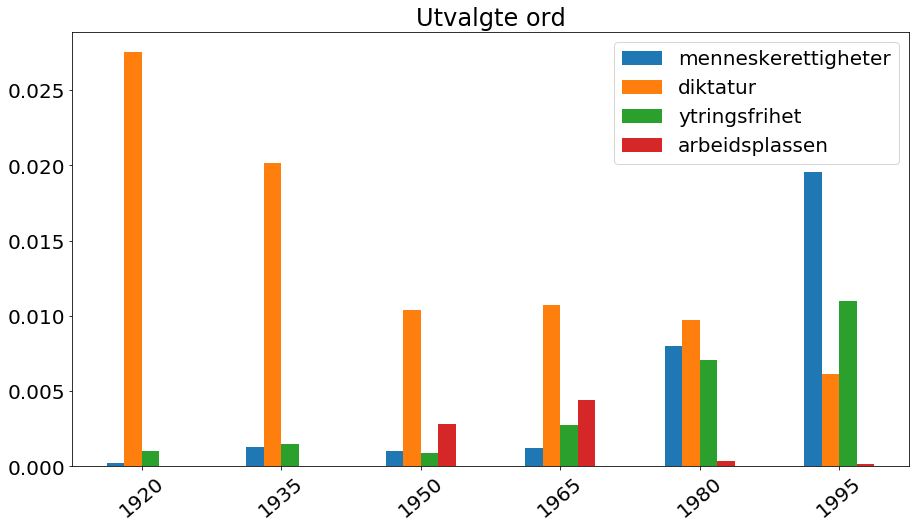

In [164]:
barchart(['menneskerettigheter','diktatur',"ytringsfrihet", 'arbeidsplassen'], 'Utvalgte ord');

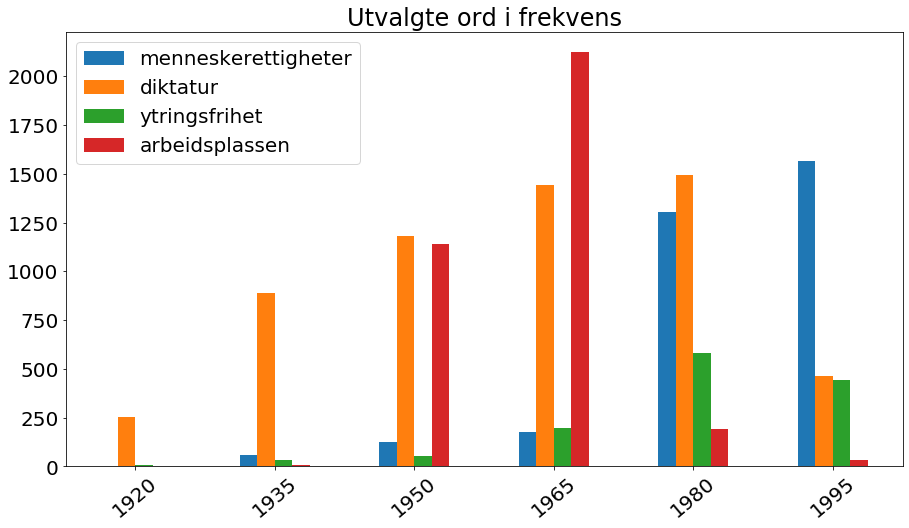

In [165]:
aggchart(['menneskerettigheter','diktatur',"ytringsfrihet", 'arbeidsplassen'], 'Utvalgte ord i frekvens');

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [166]:
pmi.sort_values(by=1935, ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1920,1935,1950,1965,1980,1995
diktatur,0.0275252,0.0201816,0.0104121,0.0107258,0.00974349,0.00613167
kommunisme,0.00130812,0.00812394,0.00724425,0.00339172,0.00241329,0.00246976
sosialisme,0.00268965,0.00808811,0.00737364,0.0102617,0.00347929,0.00193598
demokrati,0.00553765,0.00652724,0.00494788,0.00512981,0.00349728,0.00323475
levedyktig,0.000275952,0.00531267,0.00323356,0.0037273,0.00249618,0.00166987
demokratiet,0.00377596,0.00507445,0.00302559,0.00357549,0.00265602,0.00265205
liberalisme,0.0051254,0.00503985,0.0014192,0.000591404,0.000854051,0.000527263
demokratiets,0.0047873,0.00478999,0.00277496,0.003123,0.00161442,0.00131972
Sovjet-Samveldet,0.000247471,0.00420082,0.00131088,8.3985e-05,0,0
Demokrati,0.00185841,0.00360669,0.00233054,0.00457253,0.00378791,0.00469513


<br>
<br>

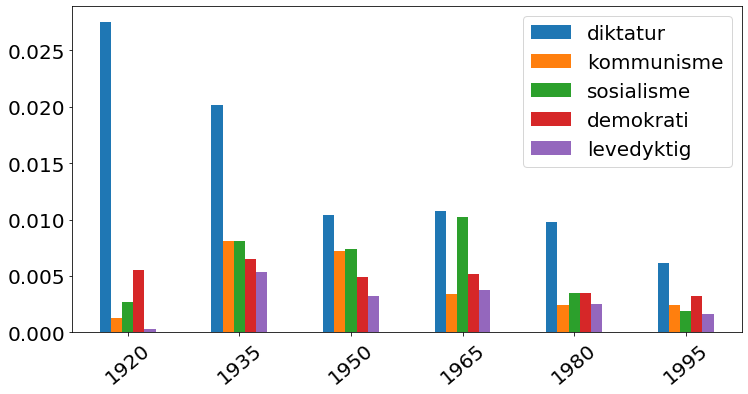

In [167]:
pmi.sort_values(by=1935, ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=40, figsize=(12, 6));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden 1965-1980 sortert på ordklasser

In [168]:
mdprint(pmi.sort_values(by=1965, ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Demokrati, Hellas, NTB, Bratteli, Arbeiderpartiets, Venstres, EEC, Borten, Arbeiderpartiet, 19.00, Portugal, Høyres, Willoch, Sosialistisk, Tsjekkoslovakia, Landsorganisasjonen, Nordli, Vårt, Statsminister, 20.00, Spanias, Gustavsen</span>

## adj
<span style='font-size:1.5em'>industrielt, parlamentarisk, sosialistisk, parlamentariske, levedyktig, liberalt, sosialistiske, reelt, folkevalgte, vestlig, demokratiske, portugisiske, demokratisk, totalitære, forenlig, uforenlig, uverdig, sunt, representative</span>
## subst
<span style='font-size:1.5em'>diktatur, sosialisme, demokrati, demokratiet, kommunisme, styreform, hverdagen, rettssikkerhet, ytringsfrihet, spilleregler, styresett, fagbevegelsen, trusel, byråkrati, velgerne, menneskeverd, sosialismen, arbeidslivet, frihet, solidaritet, fridom, folkeavstemning, menneskerettigheter, likestilling, slagord, humanisme, parodi, slagordet, valgkampen, kapitalisme, arbeiderbevegelse, komité, toleranse, medansvar, rettferd, suverenitet, arbeiderbevegelsen, uavhengighet, sosialister</span>
## unknown
<span style='font-size:1.5em'>arbeidsplassen, demokratiets, proletariatets, demokratisering, kvardagen, desentralisering, arbeidsplassene, onsker, komite, medbestemmelse, arbeiderbevegelsens, folkenes, samfunnslivet, stotte, flertallets, språkleg</span>
## verb
<span style='font-size:1.5em'>undergrave, praktiserer, framholdt</span>
## det
<span style='font-size:1.5em'>vårt</span>


<br>
<br>

# De fremste blandt temaene

In [171]:
pos=""
for x in demokrati_dict:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.5em'>{stuff}</span>".format(stuff= ', '.join(demokrati_dict[x][:5]) ) + "\n"
mu.printmd(pos)

### rettferdighet-solidaritet
<span style='font-size:1.5em'>rettferdighet, solidaritet, likhet, toleranse, sannhet</span>
### sosialisme-diktatur
<span style='font-size:1.5em'>sosialisme, diktatur, kommunisme, Demokrati, kapitalisme</span>
### demokrati-frihet
<span style='font-size:1.5em'>demokrati, frihet, likestilling, likeverd, folkestyre</span>
### velferd-trygghet
<span style='font-size:1.5em'>velferd, trygghet, velstand, helse, liv</span>
### fred-fridom
<span style='font-size:1.5em'>fred, fridom, rettferd, forsoning, ro</span>
### åpenhet-medbestemmelse
<span style='font-size:1.5em'>åpenhet, medbestemmelse, respekt, fleksibilitet, ærlighet</span>
### menneskerettigheter-rettssikkerhet
<span style='font-size:1.5em'>menneskerettigheter, rettssikkerhet, ytringsfrihet, menneskeverd, likebehandling</span>
### Frihet-Fedreland
<span style='font-size:1.5em'>Frihet, Fedreland, Fred</span>


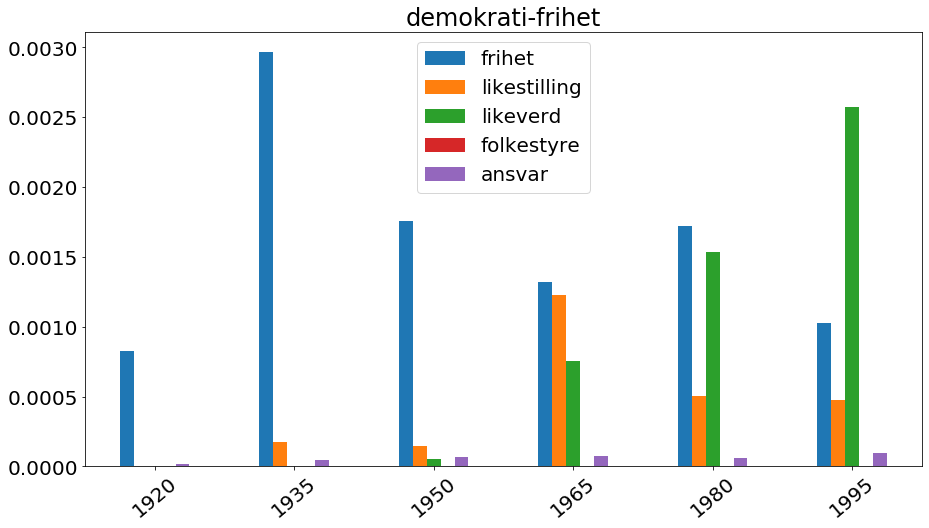

In [172]:
barchart(demokrati_dict['demokrati-frihet'][1:6], 'demokrati-frihet');

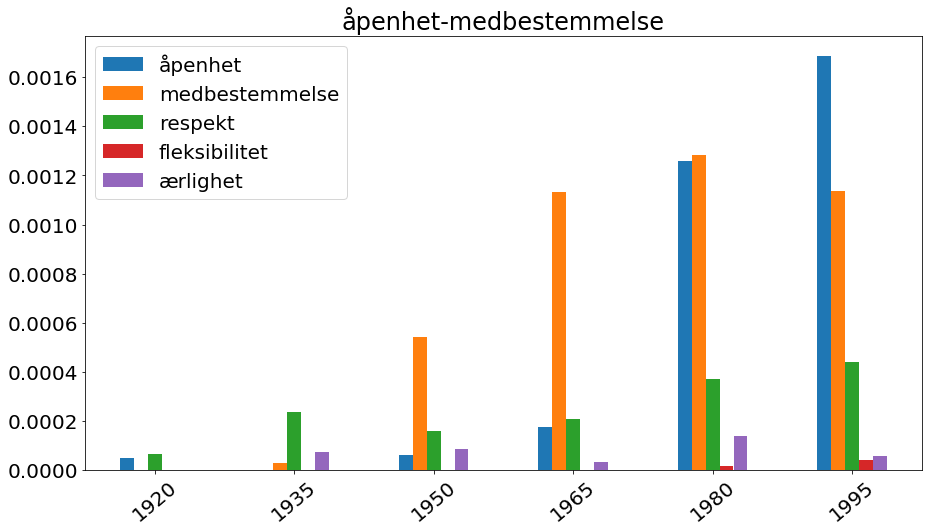

In [173]:
barchart(demokrati_dict['åpenhet-medbestemmelse'][0:5],'åpenhet-medbestemmelse' );

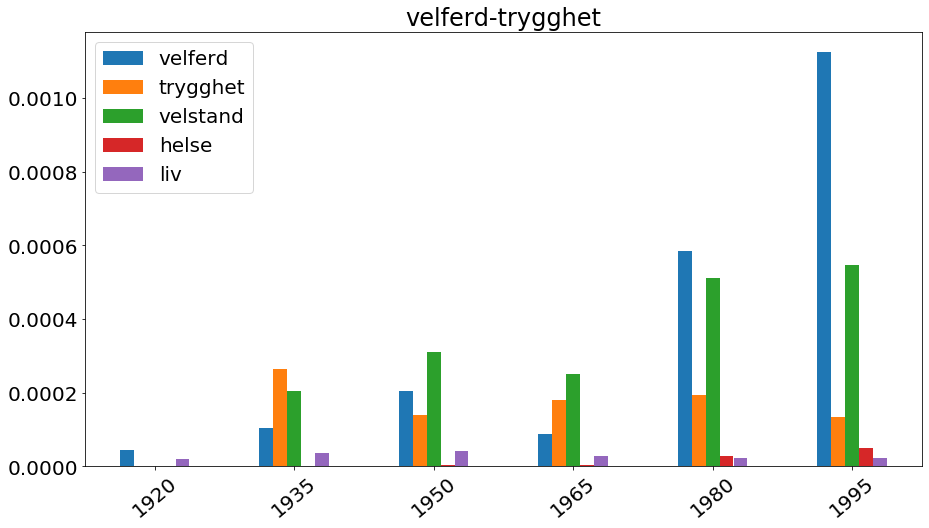

In [174]:
barchart(demokrati_dict['velferd-trygghet'][0:5],'velferd-trygghet' );